In [2]:
import pandas as pd
import pyximport
import numpy as np
pyximport.install(setup_args={"include_dirs": np.get_include()},
                  reload_support=True)
from algorithms.knn_neighborhood import UserKNN
from surprise import Reader, Dataset

In [3]:
def gini(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

# MovieLens-100k

In [4]:
ml100k_df = pd.read_csv("data/ml-100k/ml-100k/u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])
ml100k_df.drop(columns=["timestamp"], inplace=True)
ml100k_df.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [5]:
print("Nr. of ratings: %d" % len(ml100k_df))
print("Nr. of users: %d" % ml100k_df["user_id"].nunique())
print("Nr. of items: %d" % ml100k_df["item_id"].nunique())
print("Density: %f" % (len(ml100k_df) / (ml100k_df["user_id"].nunique() * ml100k_df["item_id"].nunique())))
print("Avg. nr. of ratings per user: %f" % ml100k_df.groupby("user_id").size().mean())
print("Avg. nr. of ratings per item: %f" % ml100k_df.groupby("item_id").size().mean())

Nr. of ratings: 100000
Nr. of users: 943
Nr. of items: 1682
Density: 0.063047
Avg. nr. of ratings per user: 106.044539
Avg. nr. of ratings per item: 59.453032


In [6]:
ml100k_df.groupby("item_id").size().skew(), ml100k_df.groupby("user_id").size().skew()

(2.313047043543274, 1.9056092374247244)

<AxesSubplot:>

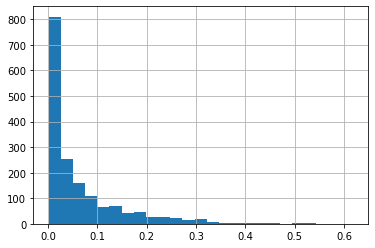

In [7]:
item_popularity = ml100k_df.groupby("item_id").size().sort_values(ascending=False) / ml100k_df["user_id"].nunique()
item_popularity.hist(bins=25)

<AxesSubplot:>

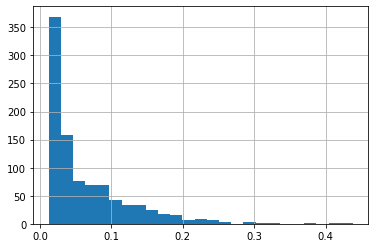

In [8]:
user_popularity = ml100k_df.groupby("user_id").size().sort_values(ascending=False) / ml100k_df["item_id"].nunique()
user_popularity.hist(bins=25)

In [9]:
item_ratings = ml100k_df.groupby("item_id").size().values
gini(item_ratings)

0.628999631391201

In [10]:
user_ratings = ml100k_df.groupby("user_id").size().values
gini(user_ratings)

0.47190850477200424

In [63]:
upop = ml100k_df.groupby("user_id").size()
(upop >= 30).sum() / len(upop)

0.7889713679745494

# MovieLens-1M

In [12]:
ml1m_df = pd.read_csv("data/ml-1m/ratings.dat", sep="::", names=["user_id", "item_id", "rating", "timestamp"])
ml1m_df.drop(columns=["timestamp"], inplace=True)
ml1m_df.head()

C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,user_id,item_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [13]:
print("Nr. of ratings: %d" % len(ml1m_df))
print("Nr. of users: %d" % ml1m_df["user_id"].nunique())
print("Nr. of items: %d" % ml1m_df["item_id"].nunique())
print("Density: %f" % (len(ml1m_df) / (ml1m_df["user_id"].nunique() * ml1m_df["item_id"].nunique())))
print("Avg. nr. of ratings per user: %f" % ml1m_df.groupby("user_id").size().mean())
print("Avg. nr. of ratings per item: %f" % ml1m_df.groupby("item_id").size().mean())

Nr. of ratings: 1000209
Nr. of users: 6040
Nr. of items: 3706
Density: 0.044684
Avg. nr. of ratings per user: 165.597517
Avg. nr. of ratings per item: 269.889099


In [14]:
ml1m_df.groupby("item_id").size().skew(),ml1m_df.groupby("user_id").size().skew()

(2.8149359623768393, 2.7446477772637743)

<AxesSubplot:>

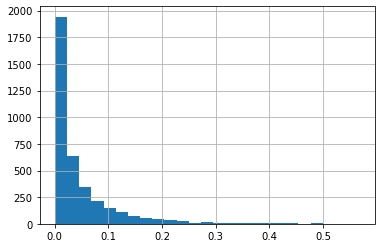

In [15]:
item_popularity = ml1m_df.groupby("item_id").size().sort_values(ascending=False) / ml1m_df["user_id"].nunique()
item_popularity.hist(bins=25)

<AxesSubplot:>

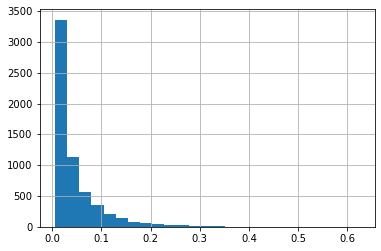

In [16]:
user_popularity = ml1m_df.groupby("user_id").size().sort_values(ascending=False) / ml1m_df["item_id"].nunique()
user_popularity.hist(bins=25)

In [17]:
item_ratings = ml1m_df.groupby("item_id").size().values
gini(item_ratings)

0.6335616301416965

In [18]:
user_ratings = ml1m_df.groupby("user_id").size().values
gini(user_ratings)

0.5286242435264804

In [19]:
reader = Reader(rating_scale=(1, 5))
trainset = Dataset.load_from_df(ml1m_df, reader=reader).build_full_trainset()
sim = UserKNN.compute_similarities(trainset, min_support=1)
print(sim.mean())

0.9147080754579449


# Anime Small, Sample of 10k users

In [38]:
anime_df = pd.read_csv("data/anime_small/rating.csv")
anime_df.columns = ["user_id", "item_id", "rating"]
print("Nr. of ratings: %d" % len(anime_df))
print("Nr. of users: %d" % anime_df["user_id"].nunique())
print("Nr. of items: %d" % anime_df["item_id"].nunique())
print("Density: %f" % (len(anime_df) / (anime_df["user_id"].nunique() * anime_df["item_id"].nunique())))
print("Avg. nr. of ratings per user: %f" % anime_df.groupby("user_id").size().mean())
print("Avg. nr. of ratings per item: %f" % anime_df.groupby("item_id").size().mean())

Nr. of ratings: 7813737
Nr. of users: 73515
Nr. of items: 11200
Density: 0.009490
Avg. nr. of ratings per user: 106.287656
Avg. nr. of ratings per item: 697.655089


In [39]:
anime_df = pd.read_csv("data/anime_small/rating.csv")
anime_df.columns = ["user_id", "item_id", "rating"]
user_sample = np.random.choice(anime_df["user_id"].unique(), size=10000, replace=False)
anime_df = anime_df[anime_df["user_id"].isin(user_sample)]
anime_df.head()

,user_id,item_id,rating
2215,18,64,9
2216,18,65,9
2217,18,199,9
2218,18,317,10
2219,18,431,10


In [40]:
print("Nr. of ratings: %d" % len(anime_df))
print("Nr. of users: %d" % anime_df["user_id"].nunique())
print("Nr. of items: %d" % anime_df["item_id"].nunique())
print("Density: %f" % (len(anime_df) / (anime_df["user_id"].nunique() * anime_df["item_id"].nunique())))
print("Avg. nr. of ratings per user: %f" % anime_df.groupby("user_id").size().mean())
print("Avg. nr. of ratings per item: %f" % anime_df.groupby("item_id").size().mean())

Nr. of ratings: 1037625
Nr. of users: 10000
Nr. of items: 8146
Density: 0.012738
Avg. nr. of ratings per user: 103.762500
Avg. nr. of ratings per item: 127.378468


In [44]:
upop = anime_df.groupby("user_id").size()
(upop >= 20).sum() / len(upop)

0.7323

In [45]:
ipop = anime_df.groupby("item_id").size()
(ipop >= 15).sum() / len(ipop)

0.5456665848269089

In [34]:
anime_df.groupby("item_id").size().skew(), anime_df.groupby("user_id").size().skew()

(5.75242637459814, 4.060996486630181)

<AxesSubplot:>

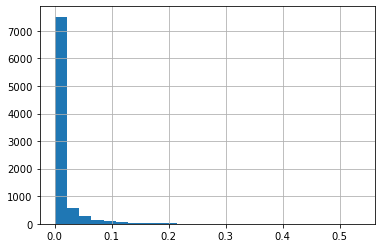

In [35]:
item_popularity = anime_df.groupby("item_id").size().sort_values(ascending=False) / anime_df["user_id"].nunique()
item_popularity.hist(bins=25)

<AxesSubplot:>

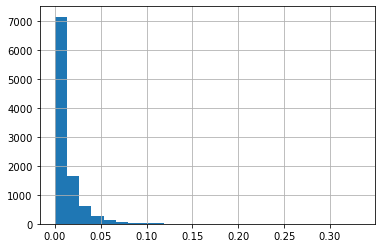

In [36]:
user_popularity = anime_df.groupby("user_id").size().sort_values(ascending=False) / anime_df["item_id"].nunique()
user_popularity.hist(bins=25)

In [ ]:
item_ratings = anime_df.groupby("item_id").size().values
gini(item_ratings)

In [ ]:
user_ratings = anime_df.groupby("user_id").size().values
gini(user_ratings)

In [37]:
ipop = anime_df.groupby("item_id").size()
(ipop >= 30).sum() / len(ipop)

0.39376285126799176

# Jester

In [73]:
jester_df = pd.read_csv("data/jester/sample.csv", sep=";", header=None, names=["user_id", "item_id", "rating"])
jester_df.head()

,user_id,item_id,rating
0,0,0,-7.82
1,0,1,8.79
2,0,2,-9.66
3,0,3,-8.16
4,0,4,-7.52


<AxesSubplot:>

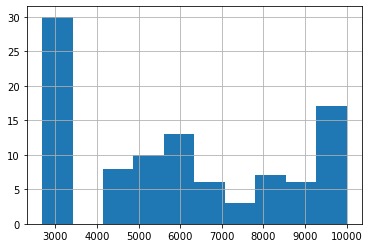

In [76]:
jester_df.groupby("item_id").size().hist()

<AxesSubplot:>

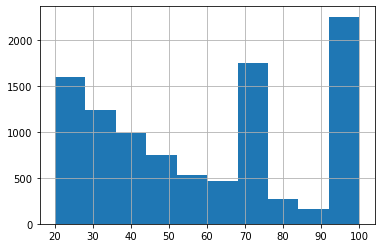

In [77]:
jester_df.groupby("user_id").size().hist()